In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')

In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data=raw_data.drop(['Model'],axis=1)

In [13]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [15]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [16]:
data_no_mv=data.dropna(axis=0)

In [17]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [19]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


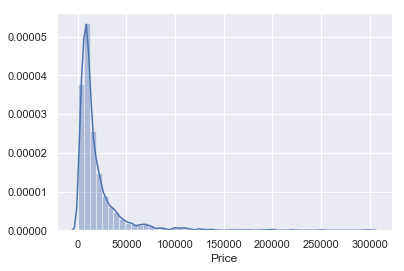

In [22]:
sns.distplot(data_no_mv['Price'])

In [25]:
q=data_no_mv["Price"].quantile(0.99)
data1=data_no_mv[data_no_mv["Price"] < q]

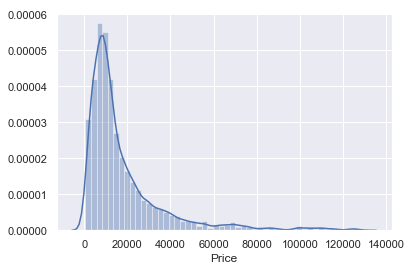

In [28]:
sns.distplot(data1["Price"])


In [29]:
q=data1["Mileage"].quantile(0.99)
data2=data1[data1["Mileage"] < q]

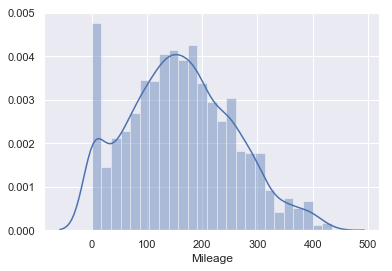

In [37]:

sns.distplot(data2["Mileage"])

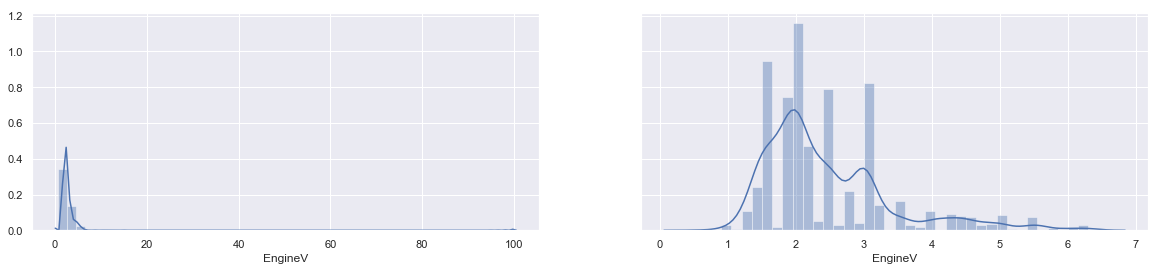

In [77]:
fig, axis = plt.subplots(1, 2, sharey=True, figsize=(20,4))
sns.distplot(data2["EngineV"] , ax=axis[0])
data3=data2[data2["EngineV"] < 6.5]
sns.distplot(data3["EngineV"], ax=axis[1])



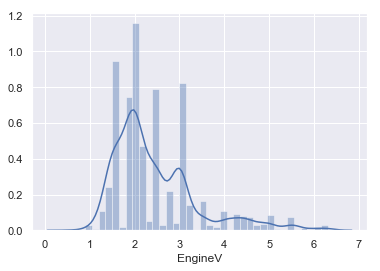

In [69]:
sns.distplot(data3["EngineV"])

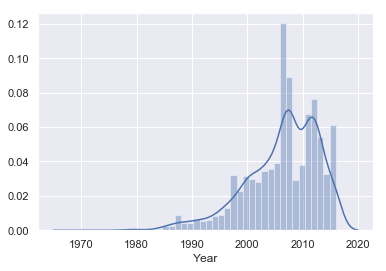

In [41]:
q=data3["Year"].quantile(0.01)
sns.distplot(data3["Year"])

In [42]:
data4=data3[data3["Year"] > q]

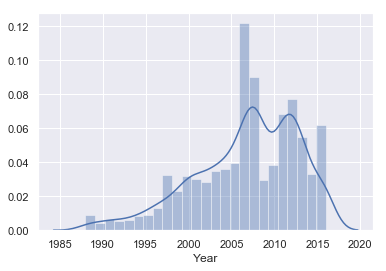

In [44]:
sns.distplot(data4["Year"])

In [45]:
data_cleaned=data4.reset_index(drop=True)

Text(0.5, 1.0, 'Price and Mileage')

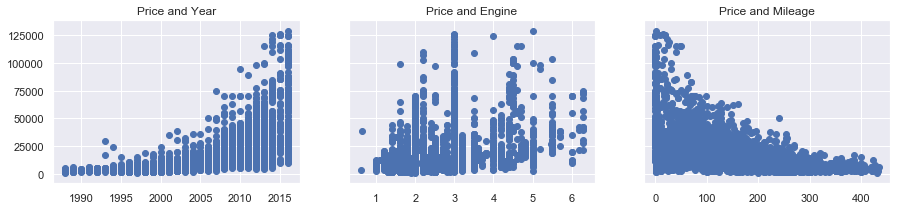

In [76]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True , figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price and Engine")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")

In [79]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned.describe()

,Price,Mileage,EngineV,Year,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


Text(0.5, 1.0, 'Price and Mileage')

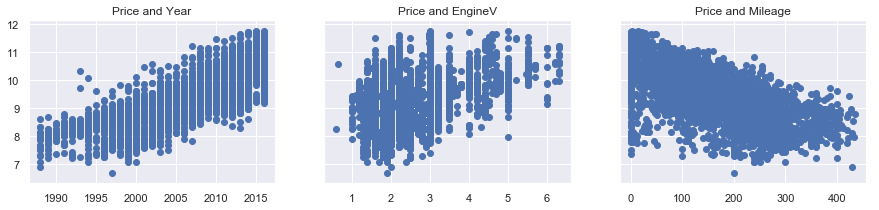

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True , figsize=(15,3))
ax1.scatter(data_cleaned["Year"] ,data_cleaned["log_price"])
ax1.set_title("Price and Year")

ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("Price and EngineV")

ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("Price and Mileage")


In [86]:
data_cleaned=data_cleaned.drop(["Price"],axis=1)

In [87]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [88]:
variables=data_cleaned[["Mileage","EngineV","Year"]]

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

In [91]:
vif=pd.DataFrame()

In [92]:
variables.shape

(3867, 3)

In [94]:
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [95]:
vif

,VIF
0,3.791584
1,7.662068
2,10.354854


In [96]:
data_no_multicollinearity=data_cleaned.drop(["Year"],axis=1)

In [97]:
data_no_multicollinearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [100]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [103]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [104]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [105]:
col = [ 'log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [107]:
data_preprocessed=data_with_dummies[col]

In [108]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [121]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"], axis=1)
from sklearn.preprocessing import StandardScaler

In [110]:
scaler=StandardScaler()

In [116]:
scaler.fit(inputs)

C:\Users\sindhu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [118]:
inputs_scaled=scaler.transform(inputs)

C:\Users\sindhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [119]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=365)

In [124]:
reg=LinearRegression()

In [126]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
reg.intercept_

9.415239458021299

In [128]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [129]:
y_hat= reg.predict(x_train)

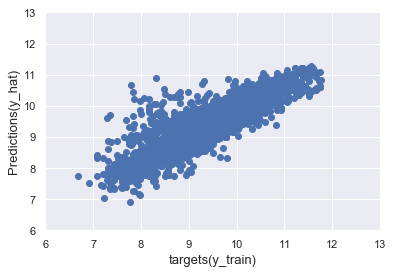

In [134]:
plt.scatter(y_train,y_hat)
plt.xlabel("targets(y_train)", fontsize=13)
plt.ylabel("Predictions(y_hat)", fontsize=13)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

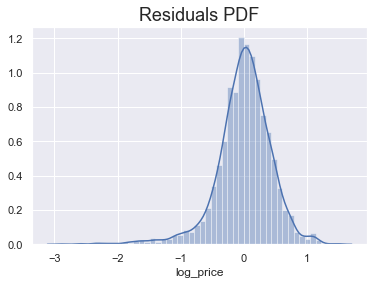

In [138]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size=18)

In [139]:
reg.score(x_train,y_train)

0.744996578792662

In [140]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=["Features"])

In [141]:
reg_summary["Weights"]=reg.coef_

In [142]:
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [143]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [144]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [158]:
variable=data_preprocessed

In [147]:
variable

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [159]:
vif1=pd.DataFrame()
variable.shape

(3867, 18)

In [161]:
vif1["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]

In [164]:
vif1["Features"]=data_preprocessed.columns.values

In [165]:
vif1

,VIF,Features
0,41.981260,log_price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [166]:
col = data_preprocessed.columns.values

In [167]:
col

array(['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [168]:
col1 = ['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [171]:
data_col=data_preprocessed[col1]

In [172]:
data_col.describe()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,0.161365,0.195242,0.078097,0.111715,0.128782,0.219291,0.065425,0.095681,0.379364,0.096199,0.157745,0.146884,0.025601,0.360228,0.906387
std,95.633291,0.949366,0.367915,0.396438,0.268358,0.315056,0.335002,0.413820,0.247307,0.294192,0.485291,0.294902,0.364549,0.354036,0.157963,0.480128,0.291327
min,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,157.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,225.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,435.000000,6.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
vif2=pd.DataFrame()

In [178]:
vif2["VIF"] = [variance_inflation_factor(data_col.values, i) for i in range(data_col.shape[1])]

In [181]:
vif2["Features"] = data_col.columns.values

In [182]:
vif2

,VIF,Features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [203]:
data_with_dummies_new=pd.get_dummies(data_no_multicollinearity)

In [204]:
vif4=pd.DataFrame()
data_final=data_with_dummies_new.drop(["log_price"],axis=1)
data_final.shape

(3867, 21)

In [205]:
vif4["VIF"]=[variance_inflation_factor(data_final.values, i) for i in range(data_final.shape[1])]

In [206]:
vif4["Features"]=data_final.columns

In [207]:
vif4

,VIF,Features
0,1.266554,Mileage
1,1.575735,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


In [208]:
#Testing

In [209]:
y_hat_test=reg.predict(x_test)

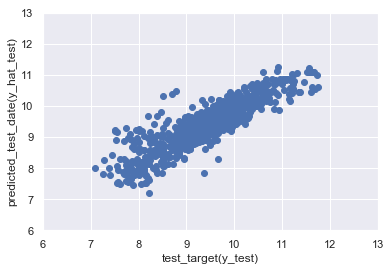

In [214]:
plt.scatter(y_test,y_hat_test)
plt.xlabel("test_target(y_test)")
plt.ylabel("predicted_test_date(y_hat_test)")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [218]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=["Prediction"])

In [219]:
df_pf["target"]=np.exp(y_test)

In [222]:
y_test=y_test.reset_index(drop=True)

In [223]:
df_pf["target"]=np.exp(y_test)

In [225]:
df_pf['Residual']=df_pf['target']-df_pf['Prediction']

In [235]:
df_pf['Difference%']= np.absolute(df_pf['Residual']/df_pf['target']*100)

In [236]:
df_pf

,Prediction,target,Residual,Percent,Difference%
0,10685.50,2300.00,-8385.50,-364.59,364.59
1,3499.26,2800.00,-699.26,-24.97,24.97
2,7553.29,2500.00,-5053.29,-202.13,202.13
3,7463.96,6400.00,-1063.96,-16.62,16.62
4,11353.49,9150.00,-2203.49,-24.08,24.08
5,21289.80,20000.00,-1289.80,-6.45,6.45
6,20159.19,38888.00,18728.81,48.16,48.16
7,20349.62,16999.00,-3350.62,-19.71,19.71
8,11581.54,12500.00,918.46,7.35,7.35
9,33614.62,41000.00,7385.38,18.01,18.01


In [237]:

pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,target,Residual,Percent,Difference%
698,30480.85,30500.00,19.15,0.06,0.06
742,16960.31,16999.00,38.69,0.23,0.23
60,12469.21,12500.00,30.79,0.25,0.25
110,25614.14,25500.00,-114.14,-0.45,0.45
367,42703.68,42500.00,-203.68,-0.48,0.48
369,3084.69,3100.00,15.31,0.49,0.49
769,29651.73,29500.00,-151.73,-0.51,0.51
272,9749.53,9800.00,50.47,0.52,0.52
714,23118.07,22999.00,-119.07,-0.52,0.52
630,8734.58,8800.00,65.42,0.74,0.74
